<a href="https://colab.research.google.com/github/MeldaChen/practice/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Latex Math 語法都會用錢幣符號開始與結束
$ Area = \frac{1}{2} \pi r^2$

2. machine learning 建議1000-10000筆，除非欄位數很少，例如鳶尾花問題；訓練比例建議9:1 (train: test)
  deep learning 建議10000筆以上

3. 分群問題可用分類訓練，但不給答案

4. pandas 建立出的表格(如下df),被 drop 後不影響原本表格，會創造出新的

5. 每種演算法都不要"完美訓練(過擬合overfitting)"，不要學習太過稀少的例子,實際使用上就無法包容例外，故會使用"前剪枝"(預設支架(參數)，不能長超過)或"後剪枝法"(長完再剪，試試看結果會不會一樣)，通常使用前剪枝，最常用方法為"設定最大深度 max_depth" (尤其畫random forest)

In [ ]:
# 統計需要資料量：
# ML: 1000以上     DL: 10000以上
# 資料量多寡 -> 問題難度(大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 處理資料：pandas -> DataFrame
# 進到sklearn: numpy -> array
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("ans", axis = 1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10%x, 90% y, 10%y] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [ ]:
# axis =0 表示橫軸(x)，axis = 1 表示縱軸(y)
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns = ['a', "b"],index = ["a", "b"])
# 顯示原始表格
# d

# 刪除x軸的a欄位
# d.drop("a", axis=1)

# 刪除y軸的a欄位
d.drop("a", axis=0)

,a,b
b,3,4


In [ ]:
# train_test_split 隨機切分，但會依照對應位置切分，例如2 6 10 都是list中第二個
train_test_split([1,2,3,4],
        [5,6,7,8],
        [9,10,11,12],      
        test_size=0.25)

[[3, 4, 1], [2], [7, 8, 5], [6], [11, 12, 9], [10]]

In [ ]:
# 建立演算法
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
# clf = DecisionTreeClassifier() 不設最大深度，一直訓練到gini=0為止

# fit 表示拿去訓練
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.7\ngini = 0.666\nsamples = 135\nvalue = [44, 47, 44]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 47, 44]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.147\nsamples = 50\nvalue = [0, 46, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]\nclass = virginica')]

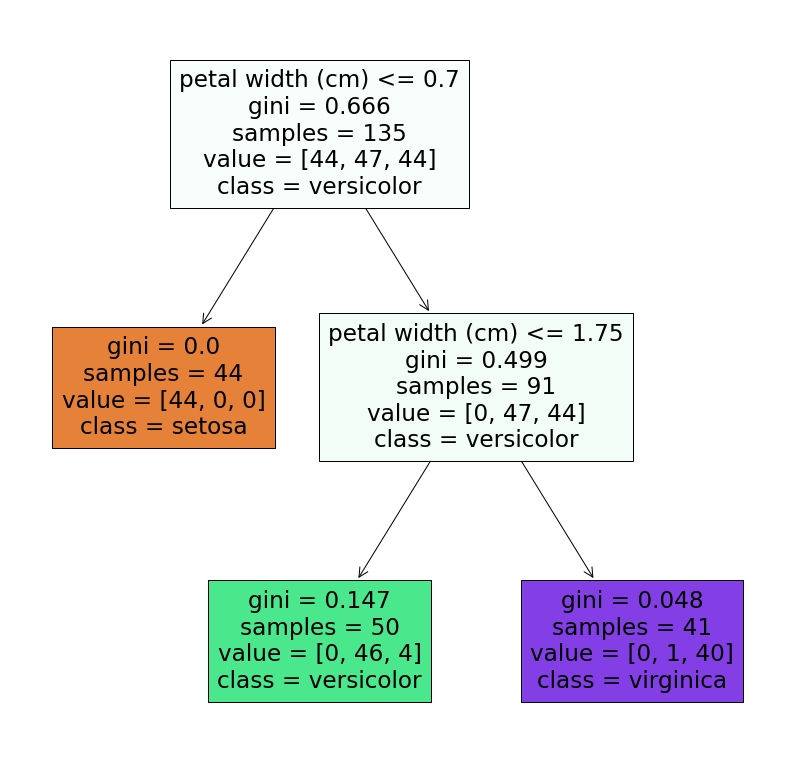

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# figure 圖像  figsize 尺寸(英吋)
plt.figure(figsize = (14, 14))

# 把clf化成決策樹，往左箭頭為True，往右為False, 
# feature_names 抓 iris["feature_names"]，class_names 抓 iris["target_names"] 
# filled表示 True的格子上色

plot_tree(clf,
     feature_names = iris["feature_names"],
     filled = True,
     class_names = iris["target_names"])

In [ ]:
# accuracy_score 準確度，1.0=100%
# predict 表示拿去驗證
# 將正確答案跟x_test以上述模型預估的結果比較

from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333